# Introduction 
This project aims to clean, explore and analyze the dataset resulting from a FiveThirtyEight survey about Star Wars, where they collected responses from fans before Star Wars: The Force Awakens came out.




# Read in the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
starwars = pd.read_csv(r"C:\Users\VIJAY KR JHA\Desktop\python\FiveThirtyEight\star-wars-survey\StarWars.csv" , encoding = "ISO-8859-1")

In [3]:
starwars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
starwars.describe()

,RespondentID
count,1.186000e+03
mean,3.290128e+09
std,1.055639e+06
min,3.288373e+09
25%,3.289451e+09
50%,3.290147e+09
75%,3.290814e+09
max,3.292880e+09


In [5]:
starwars.shape

(1187, 38)

## Cleaning
To start out cleaning the data, let's remove invalid rows, starting by dropping any row whose RespondentID column is NaN,since that value is supposed to be unique ID for each respondent.

In [6]:
starwars = starwars[pd.notnull(starwars["RespondentID"])]

In [7]:
starwars.shape

(1186, 38)

In [8]:
starwars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Next, mapping Yes/No responses to True/False in the first two columns that contain fan answers to a question will them easier to work with.

These columns are:
* Have you seen any of the 6 films in the Star Wars franchise?
* Do you consider yourself to be a fan of the Star Wars film franchise?


In [9]:
# Before cleaning
print(starwars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts())
print(starwars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts())

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [10]:
yes_no = {
    "Yes" : True,
    "No"  : False
}

yes_no_cols = ["Have you seen any of the 6 films in the Star Wars franchise?","Do you consider yourself to be a fan of the Star Wars film franchise?"]


starwars["Have you seen any of the 6 films in the Star Wars franchise?"] = starwars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
starwars["Do you consider yourself to be a fan of the Star Wars film franchise?"]= starwars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

In [11]:
#After cleaning 
print(starwars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts())
print(starwars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts())

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


Next, columns that collected responses to whether or not fans watched the Star Wars movies look pretty confusing , as well as they are content 

In [12]:
cols_seen= {
    "Which of the following Star Wars films have you seen? Please select all that apply.":"seen_1",
           "Unnamed: 4" : "seen_2",
           "Unnamed: 5" : "seen_3",
           "Unnamed: 6" : "seen_4",
           "Unnamed: 7" : "seen_5",
           "Unnamed: 8" : "seen_6"
 }

starwars = starwars.rename(columns = cols_seen)


In [13]:
starwars.columns[3:9]

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

Now, since these columns tell us whether or not fans watched the episode ,it makes sense and would be convenient to simplify them to True or False. Right now ,their elements look like this:
* Name of the episode : The fan watched the movie.
* NaN: Missing value
For this project, let's assume NaN to be the case where the fan did not see the movie. Based on that, mapping both values to True or False will work.

In [14]:
import numpy as np
seen_notseen ={"seen_notseen_1":{starwars.iloc[0,3]:True,np.NaN: False},
              "seen_notseen_2":{starwars.iloc[0,4]:True,np.NaN: False},
              "seen_notseen_3":{starwars.iloc[0,5]:True,np.NaN: False},
              "seen_notseen_4":{starwars.iloc[0,6]:True,np.NaN: False},
              "seen_notseen_5":{starwars.iloc[0,7]:True,np.NaN: False},
              "seen_notseen_6":{starwars.iloc[0,8]:True,np.NaN: False},}

for movie in range(1,7):
    starwars["seen_"+str(movie)]= starwars["seen_"+str(movie)].map(seen_notseen["seen_notseen_" + str(movie)])

In [15]:
starwars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [16]:
starwars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?æ',
       'Do yo

In [17]:
cols_name = {"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
            "Unnamed: 10":"ranking_2",
            "Unnamed: 11":"ranking_3",
            "Unnamed: 12":"ranking_4",
            "Unnamed: 13":"ranking_5",
            "Unnamed: 14":"ranking_6"}
starwars = starwars.rename(columns = cols_name)
    

In [18]:
starwars.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

In [19]:
starwars[starwars.columns[9:15]] = starwars[starwars.columns[9:15]].astype(float)


In [20]:
starwars["ranking_1"].dtypes

dtype('float64')

# Analysis
Let's start out by finding the highest-ranked movie based on the mean of each of the ranking columns previously cleaned.

In [21]:
agg_data = {}
mean_ranking = {}
for row in starwars.columns[9:15]:
    mean_ranking[row] = starwars[row].mean()
agg_data["rank_mean"] = mean_ranking
print(mean_ranking)
print(agg_data)

{'ranking_1': 3.7329341317365268, 'ranking_2': 4.087320574162679, 'ranking_3': 4.341317365269461, 'ranking_4': 3.272727272727273, 'ranking_5': 2.513157894736842, 'ranking_6': 3.047846889952153}
{'rank_mean': {'ranking_1': 3.7329341317365268, 'ranking_2': 4.087320574162679, 'ranking_3': 4.341317365269461, 'ranking_4': 3.272727272727273, 'ranking_5': 2.513157894736842, 'ranking_6': 3.047846889952153}}


In [22]:
mean_ranking_list = []
for a,b in mean_ranking.items():
    m = []
    m.append(a)
    m.append(b)
    
    mean_ranking_list.append(m)
print(mean_ranking_list)    

[['ranking_1', 3.7329341317365268], ['ranking_2', 4.087320574162679], ['ranking_3', 4.341317365269461], ['ranking_4', 3.272727272727273], ['ranking_5', 2.513157894736842], ['ranking_6', 3.047846889952153]]


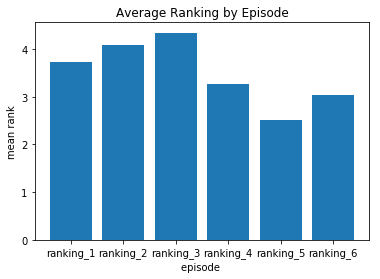

In [23]:
x=[]
y=[]
for each,value in mean_ranking.items():
    x.append(each)
    y.append(value)
plt.bar(x,y)
plt.title("Average Ranking by Episode")
plt.xlabel("episode ")
plt.ylabel("mean rank")
plt.show()

The plot shows that, on average, Episode 5 was thought as the best among all six. One of the reasons could be that it was the first Star Wars movie ever made,hence its impact on the public.

An interesting fact is that even though technology for movie FX and visual effects has improved over the years, the first trilogy has a better ranking for fans.

In addition, for the newer, first trilogy(Ep I-III) the graph shows how every episode has been getting worse as it came out, according to fans opinion.

However, all these conclusion are the result of people who voted. In order to see how reliable the ranking is, we need to know how many people voted for each episode.


In [26]:
sum_dict={}

for row in starwars.columns[3:9]:
    sum_dict[row] = starwars[row].sum()
print(sum_dict)
agg_data["Total_seen"] = sum_dict
print(agg_data)
    

{'seen_1': 673, 'seen_2': 571, 'seen_3': 550, 'seen_4': 607, 'seen_5': 758, 'seen_6': 738}
{'rank_mean': {'ranking_1': 3.7329341317365268, 'ranking_2': 4.087320574162679, 'ranking_3': 4.341317365269461, 'ranking_4': 3.272727272727273, 'ranking_5': 2.513157894736842, 'ranking_6': 3.047846889952153}, 'Total_seen': {'seen_1': 673, 'seen_2': 571, 'seen_3': 550, 'seen_4': 607, 'seen_5': 758, 'seen_6': 738}}


# Analysis by Gender

In [28]:
males = starwars[starwars["Gender"] == "Male"]
females = starwars[starwars["Gender"] == "Female"]

{'seen_1': 361, 'seen_2': 323, 'seen_3': 317, 'seen_4': 342, 'seen_5': 392, 'seen_6': 387}
{'seen_1': 298, 'seen_2': 237, 'seen_3': 222, 'seen_4': 255, 'seen_5': 353, 'seen_6': 338}


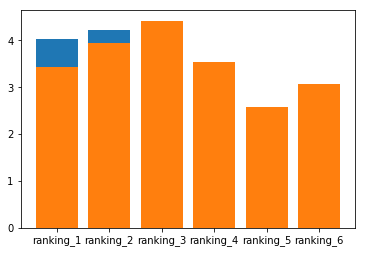

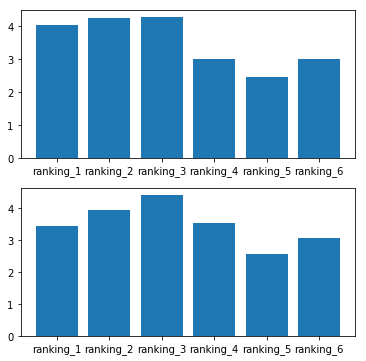

In [46]:
sum_dict_males = {}
sum_dict_females = {}
mean_ranking_males = {}
mean_ranking_females = {}

for row in starwars.columns[9:15]:
    mean_ranking_males[row] = males[row].mean()
    mean_ranking_females[row] = females[row].mean()
for row in starwars.columns[3:9]:
    sum_dict_males[row]= males[row].sum()
    sum_dict_females[row] = females[row].sum()
    
print(sum_dict_males)
print(sum_dict_females)
x1 = []
y1 = []
for rank, value in mean_ranking_males.items():
    x1.append(rank)
    y1.append(value)
plt.bar(x1,y1)
x2 = []
y2 = []
for rank, value in mean_ranking_females.items():
    x2.append(rank)
    y2.append(value)
plt.bar(x2,y2)
fig = plt.figure(figsize =(6,6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.bar(x1,y1)
ax2.bar(x2,y2)
plt.show()
    
    
    
    
    

#  Analysis by Star Wars Fans


In [30]:
#Star Wars fans
sw_fans = starwars[starwars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
not_sw_fans = starwars[starwars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

# Repeat analysis, now for both segments.

mean_ranking_sw_fans = {}
mean_ranking_not_sw_fans = {}
for row in starwars.columns[9:15]:
    mean_ranking_sw_fans[row] = sw_fans[row].mean()
    mean_ranking_not_sw_fans[row] = not_sw_fans[row].mean()
    
print(mean_ranking_sw_fans)
print(mean_ranking_not_sw_fans)
    

{'ranking_1': 4.141304347826087, 'ranking_2': 4.342391304347826, 'ranking_3': 4.417422867513611, 'ranking_4': 2.9329710144927534, 'ranking_5': 2.3333333333333335, 'ranking_6': 2.829710144927536}
{'ranking_1': 2.9363957597173145, 'ranking_2': 3.591549295774648, 'ranking_3': 4.193661971830986, 'ranking_4': 3.933098591549296, 'ranking_5': 2.862676056338028, 'ranking_6': 3.471830985915493}


<BarContainer object of 6 artists>

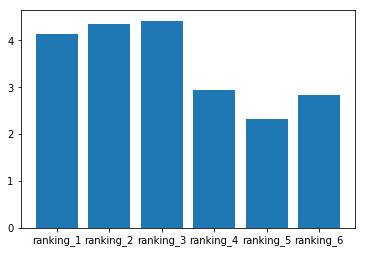

In [31]:
x = []
y = []
for rank, value in mean_ranking_sw_fans.items():
    x.append(rank)
    y.append(value)
plt.bar(x,y)

<BarContainer object of 6 artists>

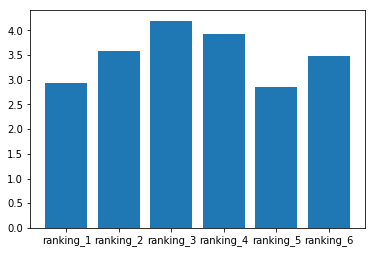

In [32]:
x = []
y = []
for rank, value in mean_ranking_not_sw_fans.items():
    x.append(rank)
    y.append(value)
plt.bar(x,y)